In [39]:
#import libraries

In [43]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime




In [44]:
#import the prepared csv file to the model

In [173]:
df = pd.read_csv('C:/Users/vivek/Downloads/Historical-Weather-Data-Scraper-master/Final Birmingham weather and water Demand data1.csv')
df = df.drop(['Unnamed: 0'] , axis = 1)
df.head() 

Date  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  2010-01-02         3        -1           1.0      7.9        1   
1  2010-01-03         1        -3           0.9      7.9        2   
2  2010-01-04         1        -3           0.0      7.9        2   
3  2010-01-05         2        -1           2.6      3.0        1   
4  2010-01-06         0        -4           1.4      4.9        1   

   moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  \
0                 85         -1          -4           1          -4   
1                 77         -3          -5           0          -5   
2                 70         -4          -6          -2          -6   
3                 63         -1          -5           0          -5   
4                 56         -2          -7          -1          -7   

   WindGustKmph  cloudcover  humidity  precipMM  pressure  tempC  visibility  \
0            27          55        89       1.4      1014      3           8   
1            21          21        85       1.0      1024      1           9   
2            19          12        86       0.0      1020      1          10   
3            21          77        93       3.0      1004      2           4   
4            37          65        92       1.7      1005      0           8   

   winddirDegree  windspeedKmph  
0            248             15  
1             51             13  
2            292             11  
3            237             13  
4            118             22

In [174]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates. 

4561   2022-06-29
4562   2022-06-30
4563   2022-07-01
4564   2022-07-02
4565   2022-07-03
4566   2022-07-04
4567   2022-07-05
4568   2022-07-06
4569   2022-07-07
4570   2022-07-08
4571   2022-07-09
4572   2022-07-10
4573   2022-07-11
4574   2022-07-12
4575   2022-07-13
Name: Date, dtype: datetime64[ns]


In [175]:
df.shape


(4576, 20)

In [176]:
#Changing the position of the demand column to the front for easy interpretation

In [177]:
first_column = df.pop('WindGustKmph')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(1, 'WindGustKmph', first_column)
  
print()
print("After Shifting column to first position")
display(df)


After Shifting column to first position


Date  WindGustKmph  maxtempC  mintempC  totalSnow_cm  sunHour  \
0     2010-01-02            27         3        -1           1.0      7.9   
1     2010-01-03            21         1        -3           0.9      7.9   
2     2010-01-04            19         1        -3           0.0      7.9   
3     2010-01-05            21         2        -1           2.6      3.0   
4     2010-01-06            37         0        -4           1.4      4.9   
...          ...           ...       ...       ...           ...      ...   
4571  2022-07-09            20        24        13           0.0     14.5   
4572  2022-07-10            17        26        12           0.0     14.5   
4573  2022-07-11            11        30        15           0.0     14.5   
4574  2022-07-12            18        28        19           0.0     14.5   
4575  2022-07-13            19        23        14           0.0     13.6   

      uvIndex  moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  \
0           1                 85         -1          -4           1   
1           2                 77         -3          -5           0   
2           2                 70         -4          -6          -2   
3           1                 63         -1          -5           0   
4           1                 56         -2          -7          -1   
...       ...                ...        ...         ...         ...   
4571        6                 70         10          18          19   
4572        6                 77         11          19          19   
4573        7                 84         13          23          23   
4574        6                 92         12          23          23   
4575        4                 99          9          18          19   

      WindChillC  cloudcover  humidity  precipMM  pressure  tempC  visibility  \
0             -4          55        89       1.4      1014      3           8   
1             -5          21        85       1.0      1024      1           9   
2             -6          12        86       0.0      1020      1          10   
3             -5          77        93       3.0      1004      2           4   
4             -7          65        92       1.7      1005      0           8   
...          ...         ...       ...       ...       ...    ...         ...   
4571          18          10        62       0.0      1031     24          10   
4572          19          21        64       0.0      1028     26          10   
4573          23          15        58       0.0      1023     30          10   
4574          23          45        53       0.0      1021     28          10   
4575          18          20        58       0.0      1023     23          10   

      winddirDegree  windspeedKmph  
0               248             15  
1                51             13  
2               292             11  
3               237             13  
4               118             22  
...             ...            ...  
4571            326             15  
4572            323             12  
4573            272              7  
4574            241             13  
4575            317             14  

[4576 rows x 20 columns]

In [178]:
#Variables for training
cols = list(df)[1:21]
#Date and volume columns are not used in training. 
print(cols)

['WindGustKmph', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph']


In [179]:
df_for_training = df[cols].astype(float)

In [180]:
#Convert into variable into arrays

In [181]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


In [182]:
df_for_training.head()

WindGustKmph  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0          27.0       3.0      -1.0           1.0      7.9      1.0   
1          21.0       1.0      -3.0           0.9      7.9      2.0   
2          19.0       1.0      -3.0           0.0      7.9      2.0   
3          21.0       2.0      -1.0           2.6      3.0      1.0   
4          37.0       0.0      -4.0           1.4      4.9      1.0   

   moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  \
0               85.0       -1.0        -4.0         1.0        -4.0   
1               77.0       -3.0        -5.0         0.0        -5.0   
2               70.0       -4.0        -6.0        -2.0        -6.0   
3               63.0       -1.0        -5.0         0.0        -5.0   
4               56.0       -2.0        -7.0        -1.0        -7.0   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0        55.0      89.0       1.4    1014.0    3.0         8.0          248.0   
1        21.0      85.0       1.0    1024.0    1.0         9.0           51.0   
2        12.0      86.0       0.0    1020.0    1.0        10.0          292.0   
3        77.0      93.0       3.0    1004.0    2.0         4.0          237.0   
4        65.0      92.0       1.7    1005.0    0.0         8.0          118.0   

   windspeedKmph  
0           15.0  
1           13.0  
2           11.0  
3           13.0  
4           22.0

In [183]:
df_for_training_scaled

array([[ 0.40545308, -1.67135056, -1.57912249, ..., -0.45916362,
         0.62137659,  0.00283606],
       [-0.20795444, -2.00363105, -1.99477187, ...,  0.18674254,
        -1.995271  , -0.31760383],
       [-0.41242362, -2.00363105, -1.99477187, ...,  0.8326487 ,
         1.2058055 , -0.63804373],
       ...,
       [-1.23030032,  2.81443612,  1.74607257, ...,  0.8326487 ,
         0.940156  , -1.27892352],
       [-0.51465821,  2.48215563,  2.57737134, ...,  0.8326487 ,
         0.52839927, -0.31760383],
       [-0.41242362,  1.65145439,  1.53824788, ...,  0.8326487 ,
         1.53786737, -0.15738389]])

In [184]:
#Training 

In [185]:
trainX = []
trainY = []


In [186]:
df_for_training.shape[0]

4576

In [187]:
#Starting step doing a sample of collecting 14 days past data and to predict the next day 

In [188]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

In [189]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [190]:
trainX

[array([[ 4.05453078e-01, -1.67135056e+00, -1.57912249e+00,
          2.48948223e+00, -3.14468929e-01, -1.52424662e+00,
          1.24433089e+00, -1.61736271e+00, -1.77526431e+00,
         -1.64870374e+00, -1.77948924e+00, -8.85608826e-02,
          7.37560130e-01, -1.59187994e-01, -4.93597284e-02,
         -1.67135056e+00, -4.59163624e-01,  6.21376593e-01,
          2.83606113e-03],
        [-2.07954444e-01, -2.00363105e+00, -1.99477187e+00,
          2.22826669e+00, -3.14468929e-01, -6.82572607e-01,
          9.88432539e-01, -2.03644832e+00, -1.92742887e+00,
         -1.83610669e+00, -1.93213888e+00, -1.44232944e+00,
          2.65999802e-01, -2.79017614e-01,  8.71056396e-01,
         -2.00363105e+00,  1.86742537e-01, -1.99527100e+00,
         -3.17603834e-01],
        [-4.12423618e-01, -2.00363105e+00, -1.99477187e+00,
         -1.22673117e-01, -3.14468929e-01, -6.82572607e-01,
          7.64521483e-01, -2.24599112e+00, -2.07959343e+00,
         -2.21091261e+00, -2.08478853e+00, -1.

In [191]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4562, 14, 19).
trainY shape == (4562, 1).


In [192]:
#Constructing a LSTM model

In [193]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 14, 64)            21504     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 33,953
Trainable params: 33,953
Non-trainable params: 0
_________________________________________________________________


In [194]:
#Building the model 

In [195]:
history = model.fit(trainX, trainY, epochs=2, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/2
257/257 [==============================] - 18s 61ms/step - loss: 0.7799 - val_loss: 0.5356
Epoch 2/2
257/257 [==============================] - 15s 58ms/step - loss: 0.6572 - val_loss: 0.4783


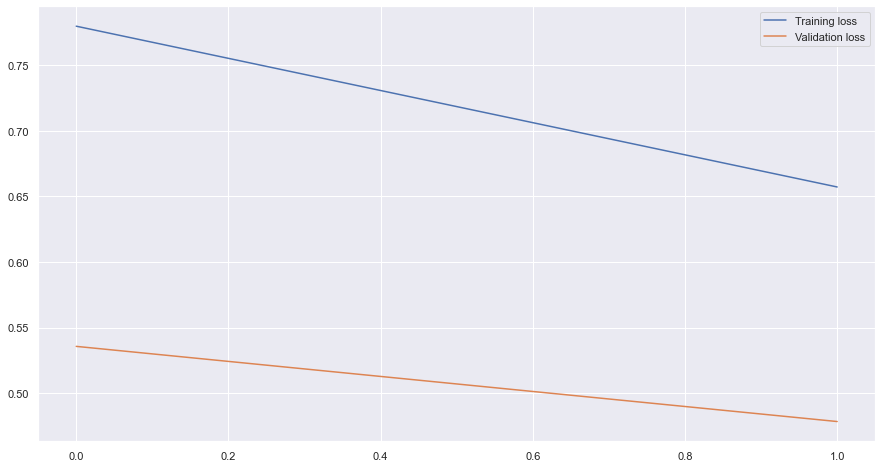

In [196]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [197]:
#Curves initally shows overfitting.Need to work on avoiding the same

In [198]:
n_future = 3066 #7 days + 1 existing day

In [199]:
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()
forecast = model.predict(trainX[-n_future:])

96/96 [==============================] - 1s 10ms/step


In [200]:
forecast_period_dates

[Timestamp('2022-07-13 00:00:00', freq='D'),
 Timestamp('2022-07-14 00:00:00', freq='D'),
 Timestamp('2022-07-15 00:00:00', freq='D'),
 Timestamp('2022-07-16 00:00:00', freq='D'),
 Timestamp('2022-07-17 00:00:00', freq='D'),
 Timestamp('2022-07-18 00:00:00', freq='D'),
 Timestamp('2022-07-19 00:00:00', freq='D'),
 Timestamp('2022-07-20 00:00:00', freq='D'),
 Timestamp('2022-07-21 00:00:00', freq='D'),
 Timestamp('2022-07-22 00:00:00', freq='D'),
 Timestamp('2022-07-23 00:00:00', freq='D'),
 Timestamp('2022-07-24 00:00:00', freq='D'),
 Timestamp('2022-07-25 00:00:00', freq='D'),
 Timestamp('2022-07-26 00:00:00', freq='D'),
 Timestamp('2022-07-27 00:00:00', freq='D'),
 Timestamp('2022-07-28 00:00:00', freq='D'),
 Timestamp('2022-07-29 00:00:00', freq='D'),
 Timestamp('2022-07-30 00:00:00', freq='D'),
 Timestamp('2022-07-31 00:00:00', freq='D'),
 Timestamp('2022-08-01 00:00:00', freq='D'),
 Timestamp('2022-08-02 00:00:00', freq='D'),
 Timestamp('2022-08-03 00:00:00', freq='D'),
 Timestamp

In [201]:
forecast.shape

(3066, 1)

In [202]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [203]:
y_pred_future

array([28.596712, 33.29143 , 33.606262, ..., 16.657438, 14.668579,
       16.515053], dtype=float32)

In [204]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    


In [205]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'WindGustKmph':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])




In [206]:
#the water demand for Birmingham for the next 7 days

In [207]:
df_forecast.head(8)

Date  WindGustKmph
0 2022-07-13     28.596712
1 2022-07-14     33.291431
2 2022-07-15     33.606262
3 2022-07-16     34.052227
4 2022-07-17     38.523514
5 2022-07-18     35.225250
6 2022-07-19     35.390381
7 2022-07-20     33.078117

In [208]:
df_forecast.shape

(3066, 2)

In [209]:
original = df[['Date', 'WindGustKmph']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2010-6-1']



C:\Users\vivek\AppData\Local\Temp\ipykernel_35168\1766746782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


C:\Users\vivek\miniconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vivek\miniconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='WindGustKmph'>

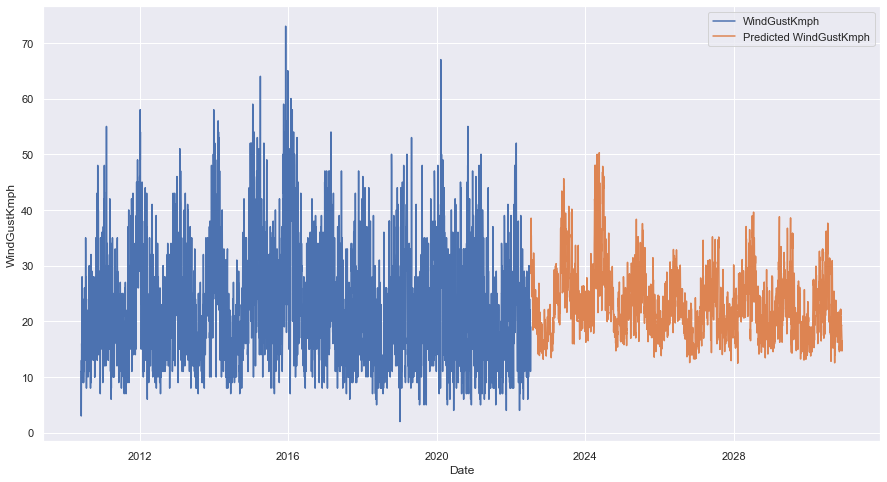

In [210]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(original['Date'], original['WindGustKmph'],label="WindGustKmph")

sns.lineplot(df_forecast['Date'], df_forecast['WindGustKmph'], label="Predicted WindGustKmph")